<a href="https://colab.research.google.com/github/Janainareisnascimento/Adsensefinal/blob/main/2022_Adsense_modelagem_team_mounted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1) Habilitando o acesso ao Google Drive no Colab**

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
from google.colab import drive


# **2) Bibliotecas fundamentais**

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Configurar o pandas para não exibir resultados em notação científica
pd.options.display.float_format = '{:.2f}'.format

# Módulos de DataPrep
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# Modelos de regressão que serão testados
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor

plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 

# Métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Configurar o pandas para não exibir resultados em notação científica
pd.options.display.float_format = '{:.2f}'.format

# **3) Perguntas a serem respondidas**


1.   Qual o valor de monetização/mês realizado por canal na modalidade Reserva?
2.   Qual o valor de monetização/mês realizado por canal na modalidade Leilão?
3. O valor de monetização/mês na modalidade reserva é compativel com nosso baseline?
4.  O valor de monetização/mês na modalidade Leilão é compativel com nosso baseline?
3. Qual foi o valor total monetizado na modalidade reserva no período?
4. Qual foi o valor total monetizado na modalidade Leilão no período?
5. Qual a relação entre valor monetizado e engajamento do canal/vídeos?







# **4) Hipóteses a serem testadas**



1.  O intervalo entre os relatórios financeiros correspondem ao intervalo a ser considerado na extração mensal de receitas dos canais;
2. A soma de todas as features de receita correspondem ao valor monetizado por canal; 
3. A normalização do valor total de receitas declaradas no relatorio financeiro, juntamente com a porcentagem do valor por canal, nos levam ao valor total monetizado no canal/mês;





# **5) Importando a base de dados**

In [122]:
base_afiliados = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Adsense/2022_affiliate - Csv_afiliados.csv", thousands=',')
base_monetizacao = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Adsense/2022_resultado_monetizacao - Relatorio_financeiro (1).csv", thousands=',')

In [123]:
base_afiliados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            497 non-null    object 
 1   Canal                                         496 non-null    float64
 2   RPM (USD)                                     497 non-null    int64  
 3   Estimativa de reproduções monetizadas         497 non-null    int64  
 4   CPM baseado em exibição (USD)                 497 non-null    int64  
 5   CPM (USD)                                     497 non-null    int64  
 6   Impressões de anúncios                        497 non-null    int64  
 7   Sua receita estimada do Google AdSense (USD)  497 non-null    int64  
 8   Sua receita estimada do DoubleClick (USD)     497 non-null    int64  
 9   Receita de anúncios no YouTube (USD)          497 non-null    int

In [124]:
base_monetizacao.head()


,Mês/Ref,Monetização
0,julho/22,"$93.676,88"
1,junho/22,"$100.184,91"
2,maio/22,"$132.574,74"
3,abril/22,"$84.194,39"
4,mar./22,"$102.920,34"


# **6) Análise exploratória dos dados**

In [125]:
base_afiliados.head()


,ID,Canal,RPM (USD),Estimativa de reproduções monetizadas,CPM baseado em exibição (USD),CPM (USD),Impressões de anúncios,Sua receita estimada do Google AdSense (USD),Sua receita estimada do DoubleClick (USD),Receita de anúncios no YouTube (USD),Sua receita estimada de anúncios (USD),Sua receita do YouTube Premium (USD),Sua receita por transação (USD),Transações,Sua receita de transações (USD),Visualizações,Tempo de exibição (horas),Duração média da visualização,Sua receita estimada (USD)
0,Total,NaN,927,637023792,1582,1238,814282751,528673727,25200103,1008005802,55387383,55716911,1051.00,37981,3992801,1083767487,9122413743,0:05:03,689250646
1,UCcXV2JeP2g9kmXP9-F1xjrg,1.00,1211,43776472,207,1557,58195911,49555108,287868,90635318,49842977,3392784,395.00,746,29484,44322171,4652720468,0:06:17,53530601
2,UCxcDCeShqZWIUQuEo2iJSVA,2.00,246,19412806,4148,2879,27969764,26713555,17580053,80521033,44293608,10907052,1333.00,20,2666,28857547,7378016505,0:15:20,5522732
3,UCIkAO7iHS6R9AtcABE9MdRQ,3.00,936,55495402,1251,1041,66696643,37889278,2853,6943178,37892132,1192938,1153.00,1665,191921,55343234,1167827263,0:12:39,51740722
4,UCf0bs928KW_GIN6q0XeiJ2Q,4.00,1138,42117326,157,1226,53918264,36340812,28404,6611202,36369216,783487,964.00,602,58031,33745666,2681969385,0:04:46,37733013


In [126]:
base_afiliados.head(15)



,ID,Canal,RPM (USD),Estimativa de reproduções monetizadas,CPM baseado em exibição (USD),CPM (USD),Impressões de anúncios,Sua receita estimada do Google AdSense (USD),Sua receita estimada do DoubleClick (USD),Receita de anúncios no YouTube (USD),Sua receita estimada de anúncios (USD),Sua receita do YouTube Premium (USD),Sua receita por transação (USD),Transações,Sua receita de transações (USD),Visualizações,Tempo de exibição (horas),Duração média da visualização,Sua receita estimada (USD)
0,Total,NaN,927,637023792,1582,1238,814282751,528673727,25200103,1008005802,55387383,55716911,1051.00,37981,3992801,1083767487,9122413743,0:05:03,689250646
1,UCcXV2JeP2g9kmXP9-F1xjrg,1.00,1211,43776472,207,1557,58195911,49555108,287868,90635318,49842977,3392784,395.00,746,29484,44322171,4652720468,0:06:17,53530601
2,UCxcDCeShqZWIUQuEo2iJSVA,2.00,246,19412806,4148,2879,27969764,26713555,17580053,80521033,44293608,10907052,1333.00,20,2666,28857547,7378016505,0:15:20,5522732
3,UCIkAO7iHS6R9AtcABE9MdRQ,3.00,936,55495402,1251,1041,66696643,37889278,2853,6943178,37892132,1192938,1153.00,1665,191921,55343234,1167827263,0:12:39,51740722
4,UCf0bs928KW_GIN6q0XeiJ2Q,4.00,1138,42117326,157,1226,53918264,36340812,28404,6611202,36369216,783487,964.00,602,58031,33745666,2681969385,0:04:46,37733013
5,UCriRvZSnEFPSMqSya2s2U6g,5.00,527,41737555,1405,1057,55512318,29011199,3244549,58662059,32255748,936023,NaN,0,0,65201800,7717478654,0:07:06,33191771
6,UCV91rzdOwAThxQS79JcYsXQ,6.00,1128,27071705,1707,1331,34726121,25399649,18609,46210177,25418258,553386,1069.00,535,57182,23558337,1695510185,0:04:19,26543465
7,UC440oU9jl0O9_4s9EKRrvEA,7.00,1013,22432995,1512,1183,28661770,18651818,1999,33909325,18653816,35717,862.00,9,776,18778772,136310128,0:04:21,19018747
8,UCPrYKS7TByOIwWvAt3tsV-A,8.00,2611,13553036,2422,1823,18006879,18058841,215,32821906,18059056,6280505,1212.00,8306,100666,13233517,4580968387,0:20:46,34406161
9,UCU7uY3wCPh9j39KXzOpqNaw,9.00,587,22656722,1448,109,30093936,18005745,291,32799853,18006037,793272,578.00,6,347,32012691,3180035234,0:05:57,18802778


In [127]:
base_afiliados.tail(15)


,ID,Canal,RPM (USD),Estimativa de reproduções monetizadas,CPM baseado em exibição (USD),CPM (USD),Impressões de anúncios,Sua receita estimada do Google AdSense (USD),Sua receita estimada do DoubleClick (USD),Receita de anúncios no YouTube (USD),Sua receita estimada de anúncios (USD),Sua receita do YouTube Premium (USD),Sua receita por transação (USD),Transações,Sua receita de transações (USD),Visualizações,Tempo de exibição (horas),Duração média da visualização,Sua receita estimada (USD)
482,UCSxJuYL6pCr7KKBZifz4oBQ,482.00,55,2,105,105,2,11,0,21,11,0,NaN,0,0,2,72,0:00:13,11
483,UC0bHB-OemT-fxGI2jMvOg6w,483.00,61,5,4,2222,9,11,0,2,11,175,NaN,0,0,3053,3145344,0:06:10,185
484,UCU98PrMvaz1KPjZGzduRYZw,484.00,4,11,1818,1818,11,11,0,2,11,32,NaN,0,0,11575,1317291,0:00:40,43
485,UCWjgnTKcQ0sUx4SWJwncIwA,485.00,48,11,1818,125,16,6,0,2,6,542,NaN,0,0,11371,4718748,0:02:29,547
486,UChXK1l5d1jSZPYDv0CeGN8w,486.00,786,2,10,10,2,11,0,2,11,0,NaN,0,0,14,3835,0:01:38,11
487,UCm24ln4lCn73Jq_l1s17-4w,487.00,368,208,96,606,33,7,0,2,7,0,NaN,0,0,19,9572,0:03:01,7
488,UCyMF5o_gAYBPDd5PkS3gugA,488.00,55,2,10,10,2,11,0,2,11,0,NaN,0,0,2,8,0:00:14,11
489,UC2jGYVKzA9FSJvyvKmcGtag,489.00,164,16,1188,1188,16,1,0,19,1,1,NaN,0,0,67,28585,0:02:33,11
490,UC4yIuHAZx1Gs7WXyAxtj7-w,490.00,25,13,1462,1462,13,1,0,19,1,0,NaN,0,0,40,2231,0:00:20,1
491,UCMIazyEMwtV_rhowPpZgxAg,491.00,5,2,95,475,4,5,0,19,5,0,NaN,0,0,1076,44977,0:02:30,5


In [128]:
display(base_afiliados)

,ID,Canal,RPM (USD),Estimativa de reproduções monetizadas,CPM baseado em exibição (USD),CPM (USD),Impressões de anúncios,Sua receita estimada do Google AdSense (USD),Sua receita estimada do DoubleClick (USD),Receita de anúncios no YouTube (USD),Sua receita estimada de anúncios (USD),Sua receita do YouTube Premium (USD),Sua receita por transação (USD),Transações,Sua receita de transações (USD),Visualizações,Tempo de exibição (horas),Duração média da visualização,Sua receita estimada (USD)
0,Total,NaN,927,637023792,1582,1238,814282751,528673727,25200103,1008005802,55387383,55716911,1051.00,37981,3992801,1083767487,9122413743,0:05:03,689250646
1,UCcXV2JeP2g9kmXP9-F1xjrg,1.00,1211,43776472,207,1557,58195911,49555108,287868,90635318,49842977,3392784,395.00,746,29484,44322171,4652720468,0:06:17,53530601
2,UCxcDCeShqZWIUQuEo2iJSVA,2.00,246,19412806,4148,2879,27969764,26713555,17580053,80521033,44293608,10907052,1333.00,20,2666,28857547,7378016505,0:15:20,5522732
3,UCIkAO7iHS6R9AtcABE9MdRQ,3.00,936,55495402,1251,1041,66696643,37889278,2853,6943178,37892132,1192938,1153.00,1665,191921,55343234,1167827263,0:12:39,51740722
4,UCf0bs928KW_GIN6q0XeiJ2Q,4.00,1138,42117326,157,1226,53918264,36340812,28404,6611202,36369216,783487,964.00,602,58031,33745666,2681969385,0:04:46,37733013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,UCdQVsgY6Nmq7ZI8jJ-5BQrA,492.00,917,2,95,95,2,11,0,19,11,0,NaN,0,0,12,17246,0:08:37,11
493,UC2rKRkK_kimfYhH-C6STgEA,493.00,27,2,9,6,3,1,0,18,1,0,NaN,0,0,37,5071,0:00:49,1
494,UC7w-n3JRbj5V-vEGHB2v0gw,494.00,35,58,31,29,62,1,0,18,1,5,NaN,0,0,434,135279,0:01:52,15
495,UCXEvyy_TWiUn9zjq_LS4gMQ,495.00,4,7,2571,1636,11,5,0,18,5,14,NaN,0,0,4540,1309081,0:01:43,19


In [129]:
base_afiliados.shape

(497, 19)

In [130]:
base_afiliados.dtypes

ID                                               object
Canal                                           float64
RPM (USD)                                         int64
Estimativa de reproduções monetizadas             int64
CPM baseado em exibição (USD)                     int64
CPM (USD)                                         int64
Impressões de anúncios                            int64
Sua receita estimada do Google AdSense (USD)      int64
Sua receita estimada do DoubleClick (USD)         int64
Receita de anúncios no YouTube (USD)              int64
Sua receita estimada de anúncios (USD)            int64
Sua receita do YouTube Premium (USD)              int64
Sua receita por transação (USD)                 float64
Transações                                        int64
Sua receita de transações (USD)                   int64
Visualizações                                     int64
Tempo de exibição (horas)                         int64
Duração média da visualização                   

In [131]:
base_afiliados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            497 non-null    object 
 1   Canal                                         496 non-null    float64
 2   RPM (USD)                                     497 non-null    int64  
 3   Estimativa de reproduções monetizadas         497 non-null    int64  
 4   CPM baseado em exibição (USD)                 497 non-null    int64  
 5   CPM (USD)                                     497 non-null    int64  
 6   Impressões de anúncios                        497 non-null    int64  
 7   Sua receita estimada do Google AdSense (USD)  497 non-null    int64  
 8   Sua receita estimada do DoubleClick (USD)     497 non-null    int64  
 9   Receita de anúncios no YouTube (USD)          497 non-null    int

In [132]:
base_afiliados.isnull().sum()

ID                                                0
Canal                                             1
RPM (USD)                                         0
Estimativa de reproduções monetizadas             0
CPM baseado em exibição (USD)                     0
CPM (USD)                                         0
Impressões de anúncios                            0
Sua receita estimada do Google AdSense (USD)      0
Sua receita estimada do DoubleClick (USD)         0
Receita de anúncios no YouTube (USD)              0
Sua receita estimada de anúncios (USD)            0
Sua receita do YouTube Premium (USD)              0
Sua receita por transação (USD)                 411
Transações                                        0
Sua receita de transações (USD)                   0
Visualizações                                     0
Tempo de exibição (horas)                         0
Duração média da visualização                     0
Sua receita estimada (USD)                        0
dtype: int64

# **7) Análise gráfica**

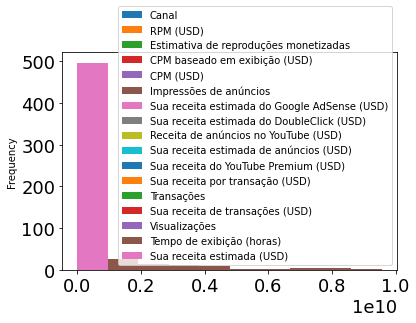

In [133]:
base_afiliados.plot.hist("Sua receita estimada (USD)");

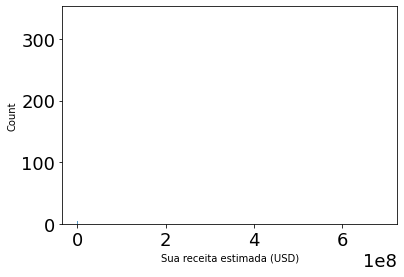

In [134]:
sns.histplot(base_afiliados['Sua receita estimada (USD)'])


In [135]:
(base_afiliados['Sua receita estimada (USD)'])

0      689250646
1       53530601
2        5522732
3       51740722
4       37733013
         ...    
492           11
493            1
494           15
495           19
496            9
Name: Sua receita estimada (USD), Length: 497, dtype: int64

# **8) Análise estatística**

In [136]:
base_afiliados.describe()

,Canal,RPM (USD),Estimativa de reproduções monetizadas,CPM baseado em exibição (USD),CPM (USD),Impressões de anúncios,Sua receita estimada do Google AdSense (USD),Sua receita estimada do DoubleClick (USD),Receita de anúncios no YouTube (USD),Sua receita estimada de anúncios (USD),Sua receita do YouTube Premium (USD),Sua receita por transação (USD),Transações,Sua receita de transações (USD),Visualizações,Tempo de exibição (horas),Sua receita estimada (USD)
count,496.00,497.00,497.00,497.00,497.00,497.00,497.00,497.00,497.00,497.00,497.00,86.00,497.00,497.00,497.00,497.00,497.00
mean,248.50,709.04,2563304.31,1915.41,1470.64,3276578.77,2108140.19,101387.09,3731386.90,1140832.75,200559.66,809.48,152.84,14043.70,4359579.74,545762111.33,2612987.60
std,143.33,1611.15,28980333.01,5971.75,2369.89,37045016.10,24077410.01,1385046.27,45764231.50,5282469.16,2574576.56,696.68,1784.25,183710.46,49368243.64,1494147226.24,31280789.69
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,2.00,1.00,0.00,9.00,0.00,0.00,1.00,8.00,1.00
25%,124.75,156.00,77.00,835.00,741.00,88.00,52.00,0.00,132.00,51.00,3.00,419.00,0.00,0.00,285.00,92322.00,67.00
50%,248.50,438.00,2169.00,1235.00,1019.00,2536.00,856.00,0.00,1655.00,856.00,82.00,796.00,0.00,0.00,4582.00,2305385.00,1196.00
75%,372.25,799.00,165878.00,1709.00,1397.00,197338.00,85843.00,0.00,180809.00,85844.00,3329.00,1074.25,0.00,0.00,243847.00,121043741.00,115601.00
max,496.00,29042.00,637023792.00,127389.00,35667.00,814282751.00,528673727.00,25200103.00,1008005802.00,55387383.00,55716911.00,5598.00,37981.00,3992801.00,1083767487.00,9567665724.00,689250646.00


# **9) Criando automação WEB utilizando Selenium**

In [137]:
!pip install Selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.

In [138]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',options=chrome_options)

wd.get("https://studio.youtube.com")
print(wd.title)

YouTube


In [139]:
wd.get("https://studio.youtube.com")

# **9) Regressão linear múltipla**

In [140]:
corr = base_afiliados.select_dtypes(include=['int64', 'float64']).corr() 
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,Canal,RPM (USD),Estimativa de reproduções monetizadas,CPM baseado em exibição (USD),CPM (USD),Impressões de anúncios,Sua receita estimada do Google AdSense (USD),Sua receita estimada do DoubleClick (USD),Receita de anúncios no YouTube (USD),Sua receita estimada de anúncios (USD),Sua receita do YouTube Premium (USD),Sua receita por transação (USD),Transações,Sua receita de transações (USD),Visualizações,Tempo de exibição (horas),Sua receita estimada (USD)
Canal,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
RPM (USD),-0.16,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Estimativa de reproduções monetizadas,-0.40,0.01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CPM baseado em exibição (USD),0.01,0.04,-0.01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CPM (USD),0.10,0.11,-0.01,0.17,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Impressões de anúncios,-0.40,0.01,1.00,-0.01,-0.01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Sua receita estimada do Google AdSense (USD),-0.38,0.01,1.00,-0.01,-0.01,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Sua receita estimada do DoubleClick (USD),-0.11,-0.00,0.83,0.01,0.01,0.83,0.84,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Receita de anúncios no YouTube (USD),-0.36,0.01,0.99,-0.00,-0.01,0.99,1.00,0.86,nan,nan,nan,nan,nan,nan,nan,nan,nan
Sua receita estimada de anúncios (USD),-0.36,0.03,0.60,-0.01,-0.01,0.60,0.61,0.62,0.58,nan,nan,nan,nan,nan,nan,nan,nan


In [141]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [142]:
base_afiliados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            497 non-null    object 
 1   Canal                                         496 non-null    float64
 2   RPM (USD)                                     497 non-null    int64  
 3   Estimativa de reproduções monetizadas         497 non-null    int64  
 4   CPM baseado em exibição (USD)                 497 non-null    int64  
 5   CPM (USD)                                     497 non-null    int64  
 6   Impressões de anúncios                        497 non-null    int64  
 7   Sua receita estimada do Google AdSense (USD)  497 non-null    int64  
 8   Sua receita estimada do DoubleClick (USD)     497 non-null    int64  
 9   Receita de anúncios no YouTube (USD)          497 non-null    int

In [144]:
base_afiliados["Sua receita estimada (USD)"]

0      689250646
1       53530601
2        5522732
3       51740722
4       37733013
         ...    
492           11
493            1
494           15
495           19
496            9
Name: Sua receita estimada (USD), Length: 497, dtype: int64

In [148]:
base_afiliados['RPM (USD)']

0       927
1      1211
2       246
3       936
4      1138
       ... 
492     917
493      27
494      35
495       4
496      57
Name: RPM (USD), Length: 497, dtype: int64